<a href="https://colab.research.google.com/github/jhyeon23/2022-2_ITB/blob/main/ITB%EB%B6%84%EB%A5%98%EA%B3%BC%EC%A0%9C_2112100%EB%B0%95%EC%A0%95%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*데이터 전처리*

In [59]:
!pip install mglearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [60]:
!pip install --upgrade joblib==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import mglearn

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
%matplotlib inline
import pandas as pd
import seaborn as sns        
import matplotlib.pyplot as plt 

In [63]:
import pandas as pd
mpg = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IT비즈니스혁신/health_data.csv")


display(mpg.head()) 
print(mpg.info()) 

,기준년도,가입자일련번호,시도코드,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),...,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진수검여부,치아우식증유무,치석,데이터공개일자
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   기준년도         10000 non-null  int64  
 1   가입자일련번호      10000 non-null  int64  
 2   시도코드         10000 non-null  int64  
 3   성별코드         10000 non-null  object 
 4   연령대코드(5세단위)  10000 non-null  int64  
 5   신장(5Cm단위)    10000 non-null  int64  
 6   체중(5Kg 단위)   10000 non-null  int64  
 7   허리둘레         10000 non-null  float64
 8   시력(좌)        10000 non-null  float64
 9   시력(우)        10000 non-null  float64
 10  청력(좌)        10000 non-null  int64  
 11  청력(우)        10000 non-null  int64  
 12  수축기혈압        9912 non-null   float64
 13  이완기혈압        9912 non-null   float64
 14  식전혈당(공복혈당)   9912 non-null   float64
 15  총콜레스테롤       4044 non-null   float64
 16  트리글리세라이드     4044 non-null   float64
 17  HDL콜레스테롤     4044 non-null   float64
 18  LDL콜레스테롤     3977 non-null   float64
 19  혈색소  

##변수명 변경

변수명을 모두 영어로 변경했다.

In [64]:
mpg = mpg.rename (columns = {'기준년도': 'date'})
mpg = mpg.rename (columns = {'가입자일련번호': 'number'})
mpg = mpg.rename (columns = {'시도코드': 'smoking'})
mpg = mpg.rename (columns = {'성별코드': 'gender'})
mpg = mpg.rename (columns = {'연령대코드(5세단위)': 'age'})
mpg = mpg.rename (columns = {'신장(5Cm단위)': 'height'})
mpg = mpg.rename (columns = {'체중(5Kg 단위)': 'weight'})
mpg = mpg.rename (columns = {'허리둘레': 'waist'})
mpg = mpg.rename (columns = {'시력(좌)': 'eye_left'})
mpg = mpg.rename (columns = {'시력(우)': 'eye_right'})
mpg = mpg.rename (columns = {'청력(좌)': 'ear_left'})
mpg = mpg.rename (columns = {'청력(우)': 'ear_right'})
mpg = mpg.rename (columns = {'수축기혈압': 'SBP'})
mpg = mpg.rename (columns = {'이완기혈압': 'DBP'})
mpg = mpg.rename (columns = {'식전혈당(공복혈당)': 'FBS'})
mpg = mpg.rename (columns = {'총콜레스테롤': 'total_chole'})
mpg = mpg.rename (columns = {'트리글리세라이드': 'TCD'})
mpg = mpg.rename (columns = {'HDL콜레스테롤': 'HDL'})
mpg = mpg.rename (columns = {'LDL콜레스테롤': 'LDL'})
mpg = mpg.rename (columns = {'혈색소': 'hemoglobin'})
mpg = mpg.rename (columns = {'요단백': 'PTU'})
mpg = mpg.rename (columns = {'혈청크레아티닌': 'SCT'})
mpg = mpg.rename (columns = {'(혈청지오티)AST': 'AST'})
mpg = mpg.rename (columns = {'(혈청지오티)ALT': 'ALT'})
mpg = mpg.rename (columns = {'감마지티피': 'GTP'})
mpg = mpg.rename (columns = {'흡연상태': 'smoking'})
mpg = mpg.rename (columns = {'음주여부': 'alcohol'})
mpg = mpg.rename (columns = {'구강검진수검여부': 'dental_exam'})
mpg = mpg.rename (columns = {'치아우식증유무': 'dental_caries'})
mpg = mpg.rename (columns = {'치석': 'tartar'})
mpg = mpg.rename (columns = {'데이터공개일자': 'data'})

print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           10000 non-null  int64  
 1   number         10000 non-null  int64  
 2   smoking        10000 non-null  int64  
 3   gender         10000 non-null  object 
 4   age            10000 non-null  int64  
 5   height         10000 non-null  int64  
 6   weight         10000 non-null  int64  
 7   waist          10000 non-null  float64
 8   eye_left       10000 non-null  float64
 9   eye_right      10000 non-null  float64
 10  ear_left       10000 non-null  int64  
 11  ear_right      10000 non-null  int64  
 12  SBP            9912 non-null   float64
 13  DBP            9912 non-null   float64
 14  FBS            9912 non-null   float64
 15  total_chole    4044 non-null   float64
 16  TCD            4044 non-null   float64
 17  HDL            4044 non-null   float64
 18  LDL    

In [65]:
display(mpg.head())

,date,number,smoking,gender,age,height,weight,waist,eye_left,eye_right,...,SCT,AST,ALT,GTP,smoking,alcohol,dental_exam,dental_caries,tartar,data
0,2020,1,36,M,9,165,60,72.1,1.2,1.5,...,1.1,21.0,27.0,21.0,No,No,0,NaN,NaN,12/29/2021
1,2020,2,27,F,13,150,65,81.0,0.8,0.8,...,0.5,18.0,15.0,15.0,No,No,0,NaN,NaN,12/29/2021
2,2020,3,11,F,12,155,55,70.0,0.6,0.7,...,0.7,27.0,25.0,7.0,No,No,0,NaN,NaN,12/29/2021
3,2020,4,31,M,13,160,70,90.8,1.0,1.0,...,1.2,65.0,97.0,72.0,No,No,1,0.0,0.0,12/29/2021
4,2020,5,41,F,12,155,50,75.2,1.5,1.2,...,0.7,18.0,17.0,14.0,No,No,0,NaN,NaN,12/29/2021


In [66]:
mpg.describe()

,date,number,smoking,age,height,weight,waist,eye_left,eye_right,ear_left,...,LDL,hemoglobin,PTU,SCT,AST,ALT,GTP,dental_exam,dental_caries,tartar
count,10000.0,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,3977.000000,9912.000000,9861.000000,9912.000000,9912.00000,9912.000000,9912.000000,10000.000000,3251.000000,3251.000000
mean,2020.0,5000.50000,34.100100,11.931400,160.983500,63.034500,82.366100,0.933750,0.936750,1.050500,...,116.263264,14.214255,1.119461,0.848484,27.58979,26.789851,38.098668,0.325100,0.175331,0.579514
std,0.0,2886.89568,12.394581,2.166048,9.211608,12.205294,9.561973,0.662057,0.641378,0.227936,...,37.829955,1.555386,0.489782,0.301012,17.88442,23.735687,58.184579,0.468436,0.380308,0.591269
min,2020.0,1.00000,11.000000,9.000000,130.000000,30.000000,53.000000,0.100000,0.100000,1.000000,...,13.000000,5.100000,1.000000,0.050000,3.00000,2.000000,3.000000,0.000000,0.000000,0.000000
25%,2020.0,2500.75000,27.000000,10.000000,155.000000,55.000000,76.000000,0.700000,0.700000,1.000000,...,89.000000,13.200000,1.000000,0.700000,20.00000,16.000000,16.000000,0.000000,0.000000,0.000000
50%,2020.0,5000.50000,41.000000,12.000000,160.000000,60.000000,82.000000,0.900000,0.900000,1.000000,...,115.000000,14.200000,1.000000,0.800000,24.00000,21.000000,24.000000,0.000000,0.000000,1.000000
75%,2020.0,7500.25000,44.000000,13.000000,170.000000,70.000000,88.900000,1.200000,1.200000,1.000000,...,141.000000,15.300000,1.000000,1.000000,30.00000,31.000000,39.000000,1.000000,0.000000,1.000000
max,2020.0,10000.00000,49.000000,18.000000,195.000000,130.000000,134.000000,9.900000,9.900000,3.000000,...,297.000000,20.000000,6.000000,9.200000,692.00000,1146.000000,2322.000000,1.000000,1.000000,2.000000


In [67]:
print(mpg.isnull().sum())

date                0
number              0
smoking             0
gender              0
age                 0
height              0
weight              0
waist               0
eye_left            0
eye_right           0
ear_left            0
ear_right           0
SBP                88
DBP                88
FBS                88
total_chole      5956
TCD              5956
HDL              5956
LDL              6023
hemoglobin         88
PTU               139
SCT                88
AST                88
ALT                88
GTP                88
smoking             2
alcohol             1
dental_exam         0
dental_caries    6749
tartar           6749
data                0
dtype: int64


##결측치 처리

결측치가 존재하는 모든 행을 제거했다.

In [68]:
mpg1 = mpg.dropna(axis=0)
print("결측행 모두 제거: ", mpg1.shape) 

결측행 모두 제거:  (1249, 31)


In [69]:
print(mpg1.isnull().sum())

date             0
number           0
smoking          0
gender           0
age              0
height           0
weight           0
waist            0
eye_left         0
eye_right        0
ear_left         0
ear_right        0
SBP              0
DBP              0
FBS              0
total_chole      0
TCD              0
HDL              0
LDL              0
hemoglobin       0
PTU              0
SCT              0
AST              0
ALT              0
GTP              0
smoking          0
alcohol          0
dental_exam      0
dental_caries    0
tartar           0
data             0
dtype: int64


In [70]:
mpg1.describe()

,date,number,smoking,age,height,weight,waist,eye_left,eye_right,ear_left,...,LDL,hemoglobin,PTU,SCT,AST,ALT,GTP,dental_exam,dental_caries,tartar
count,1249.0,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.00000,1249.000000,1249.000000,1249.0,1249.000000,1249.000000
mean,2020.0,5160.337070,33.387510,11.639712,161.737390,63.799039,82.505685,0.925620,0.904884,1.067254,...,120.479584,14.250040,1.110488,0.881105,26.86309,26.672538,35.453163,1.0,0.164131,0.591673
std,0.0,2841.021877,12.372829,2.173535,8.995185,12.719186,9.844860,0.652522,0.476381,0.253739,...,37.611498,1.537961,0.503794,0.356008,13.92527,23.392743,35.973387,0.0,0.370543,0.588180
min,2020.0,7.000000,11.000000,9.000000,130.000000,30.000000,57.000000,0.100000,0.100000,1.000000,...,19.000000,6.500000,1.000000,0.400000,8.00000,2.000000,3.000000,1.0,0.000000,0.000000
25%,2020.0,2761.000000,27.000000,10.000000,155.000000,55.000000,75.500000,0.700000,0.700000,1.000000,...,95.000000,13.300000,1.000000,0.700000,20.00000,16.000000,17.000000,1.0,0.000000,0.000000
50%,2020.0,5215.000000,41.000000,12.000000,160.000000,65.000000,83.000000,0.900000,0.900000,1.000000,...,120.000000,14.300000,1.000000,0.900000,24.00000,21.000000,24.000000,1.0,0.000000,1.000000
75%,2020.0,7683.000000,43.000000,13.000000,170.000000,70.000000,89.000000,1.000000,1.000000,1.000000,...,146.000000,15.400000,1.000000,1.000000,29.00000,31.000000,39.000000,1.0,0.000000,1.000000
max,2020.0,9975.000000,49.000000,18.000000,190.000000,120.000000,121.200000,9.900000,9.900000,3.000000,...,251.000000,18.100000,6.000000,8.700000,265.00000,477.000000,445.000000,1.0,1.000000,2.000000


##새로운 변수 생성

weight와 height를 이용해 BMI 변수 생성했다.

In [71]:
mpg1['height1'] = mpg1['height'].apply(lambda x : x**2)
display(mpg1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,date,number,smoking,gender,age,height,weight,waist,eye_left,eye_right,...,AST,ALT,GTP,smoking,alcohol,dental_exam,dental_caries,tartar,data,height1
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,27225
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021,25600
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021,24025
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021,24025
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021,27225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,2020,9955,30,M,9,180,70,87.5,1.2,0.9,...,22.0,21.0,19.0,No,Yes,1,0.0,1.0,12/29/2021,32400
9963,2020,9964,41,F,13,160,75,107.4,0.8,0.8,...,20.0,15.0,14.0,No,Yes,1,1.0,1.0,12/29/2021,25600
9965,2020,9966,45,F,12,155,60,80.0,1.5,1.0,...,22.0,9.0,29.0,No,No,1,0.0,0.0,12/29/2021,24025
9967,2020,9968,11,M,12,170,80,90.0,0.9,0.9,...,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0,12/29/2021,28900


In [72]:
mpg1['BMI'] = 10000*mpg1['weight']/mpg1['height1']
print(mpg1.iloc[0:5, :])

    date  number  smoking gender  age  height  weight  waist  eye_left  \
6   2020       7       44      M    9     165      80   93.0       0.8   
16  2020      17       30      M   11     160      65   90.0       0.6   
21  2020      22       41      F   11     155      50   65.9       0.7   
27  2020      28       11      M   17     155      60   82.0       0.5   
47  2020      48       26      M   16     165      65   94.0       1.5   

    eye_right  ...   ALT   GTP  smoking  alcohol  dental_exam  dental_caries  \
6         0.7  ...  20.0  35.0      Yes      Yes            1            0.0   
16        0.6  ...  54.0  24.0       No      Yes            1            0.0   
21        1.0  ...  14.0  12.0       No       No            1            0.0   
27        0.7  ...  22.0  29.0       No      Yes            1            0.0   
47        0.6  ...  20.0  43.0       No      Yes            1            0.0   

    tartar        data  height1        BMI  
6      1.0  12/29/2021    272

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [73]:
mpg1.drop(columns='height1', inplace=True)
display(mpg1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,date,number,smoking,gender,age,height,weight,waist,eye_left,eye_right,...,AST,ALT,GTP,smoking,alcohol,dental_exam,dental_caries,tartar,data,BMI
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,18.0,20.0,35.0,Yes,Yes,1,0.0,1.0,12/29/2021,29.384757
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,29.0,54.0,24.0,No,Yes,1,0.0,1.0,12/29/2021,25.390625
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,24.0,14.0,12.0,No,No,1,0.0,0.0,12/29/2021,20.811655
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,33.0,22.0,29.0,No,Yes,1,0.0,0.0,12/29/2021,24.973985
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,28.0,20.0,43.0,No,Yes,1,0.0,0.0,12/29/2021,23.875115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,2020,9955,30,M,9,180,70,87.5,1.2,0.9,...,22.0,21.0,19.0,No,Yes,1,0.0,1.0,12/29/2021,21.604938
9963,2020,9964,41,F,13,160,75,107.4,0.8,0.8,...,20.0,15.0,14.0,No,Yes,1,1.0,1.0,12/29/2021,29.296875
9965,2020,9966,45,F,12,155,60,80.0,1.5,1.0,...,22.0,9.0,29.0,No,No,1,0.0,0.0,12/29/2021,24.973985
9967,2020,9968,11,M,12,170,80,90.0,0.9,0.9,...,27.0,36.0,66.0,NotNow,Yes,1,0.0,2.0,12/29/2021,27.681661


In [74]:
def bmi(x):
  if x < 30.0:
    return "1" #bmi 30 미만은 정상.
  else:
    return "0" #bmi 30 이상은 과체중으로 처리.

In [75]:
mpg1['BMI'] = mpg1['BMI'].apply(bmi)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
def alcol(x):
  if x == 'Yes':
    return "0" #음주자는 0으로 비음주자는 1로 표시.
  else:
    return "1"

In [77]:
mpg1['alcohol'] = mpg1['alcohol'].apply(alcol)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
def fat(x):
  if x < 170.0 :
    return '1' #중성지방 170 미만은 정상.
  else:
    return '0' #중성지방 170 이상은 경계 및 위험으로 간주.

In [79]:
mpg1['TCD'] = mpg1['TCD'].apply(fat)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [80]:
display(mpg1)

,date,number,smoking,gender,age,height,weight,waist,eye_left,eye_right,...,AST,ALT,GTP,smoking,alcohol,dental_exam,dental_caries,tartar,data,BMI
6,2020,7,44,M,9,165,80,93.0,0.8,0.7,...,18.0,20.0,35.0,Yes,0,1,0.0,1.0,12/29/2021,1
16,2020,17,30,M,11,160,65,90.0,0.6,0.6,...,29.0,54.0,24.0,No,0,1,0.0,1.0,12/29/2021,1
21,2020,22,41,F,11,155,50,65.9,0.7,1.0,...,24.0,14.0,12.0,No,1,1,0.0,0.0,12/29/2021,1
27,2020,28,11,M,17,155,60,82.0,0.5,0.7,...,33.0,22.0,29.0,No,0,1,0.0,0.0,12/29/2021,1
47,2020,48,26,M,16,165,65,94.0,1.5,0.6,...,28.0,20.0,43.0,No,0,1,0.0,0.0,12/29/2021,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,2020,9955,30,M,9,180,70,87.5,1.2,0.9,...,22.0,21.0,19.0,No,0,1,0.0,1.0,12/29/2021,1
9963,2020,9964,41,F,13,160,75,107.4,0.8,0.8,...,20.0,15.0,14.0,No,0,1,1.0,1.0,12/29/2021,1
9965,2020,9966,45,F,12,155,60,80.0,1.5,1.0,...,22.0,9.0,29.0,No,1,1,0.0,0.0,12/29/2021,1
9967,2020,9968,11,M,12,170,80,90.0,0.9,0.9,...,27.0,36.0,66.0,NotNow,0,1,0.0,2.0,12/29/2021,1


##불필요한 변수 삭제

In [81]:
mpg1.drop(columns='data', inplace=True)
mpg1.drop(columns='date', inplace=True)
mpg1.drop(columns='number', inplace=True)
mpg1.drop(columns='gender', inplace=True)
mpg1.drop(columns='smoking', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [82]:
display(mpg1)

,age,height,weight,waist,eye_left,eye_right,ear_left,ear_right,SBP,DBP,...,PTU,SCT,AST,ALT,GTP,alcohol,dental_exam,dental_caries,tartar,BMI
6,9,165,80,93.0,0.8,0.7,1,2,112.0,73.0,...,1.0,0.7,18.0,20.0,35.0,0,1,0.0,1.0,1
16,11,160,65,90.0,0.6,0.6,1,1,138.0,88.0,...,1.0,1.0,29.0,54.0,24.0,0,1,0.0,1.0,1
21,11,155,50,65.9,0.7,1.0,1,1,114.0,73.0,...,1.0,0.8,24.0,14.0,12.0,1,1,0.0,0.0,1
27,17,155,60,82.0,0.5,0.7,1,1,139.0,85.0,...,1.0,1.4,33.0,22.0,29.0,0,1,0.0,0.0,1
47,16,165,65,94.0,1.5,0.6,2,2,110.0,72.0,...,1.0,1.0,28.0,20.0,43.0,0,1,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9954,9,180,70,87.5,1.2,0.9,1,1,108.0,70.0,...,1.0,0.9,22.0,21.0,19.0,0,1,0.0,1.0,1
9963,13,160,75,107.4,0.8,0.8,1,1,124.0,80.0,...,1.0,0.8,20.0,15.0,14.0,0,1,1.0,1.0,1
9965,12,155,60,80.0,1.5,1.0,1,1,135.0,86.0,...,1.0,0.6,22.0,9.0,29.0,1,1,0.0,0.0,1
9967,12,170,80,90.0,0.9,0.9,1,1,140.0,90.0,...,1.0,0.7,27.0,36.0,66.0,0,1,0.0,2.0,1


##종속 변수 설정 및 데이터 살펴보기
BMI 변수를 새롭게 생성 후 종속 변수로 설정해 분류를 진행하고자 하였으나 정상에 속하는 데이터에 비해 과체중에 속하는 데이터가 현저하게 적어 다른 변수를 종속 변수로 선택하게 되었다. 

이에 따라 중성 지방의 수치를 나타내는 트리글리세라이드(TCD)를 종속 변수로 설정하였고 150mg/dL 미만을 정상, 150~199mg/dL을 경계, 200mg/dL 이상을 위험으로 판단하기에 170mg/dL 미만의 수치를 정상으로 간주하고 1로 표기한 뒤, 이를 초과하는 수치를 경계 및 위험으로 간주하여 0으로 나타내었다.


1    1177
0      72
Name: BMI, dtype: int64


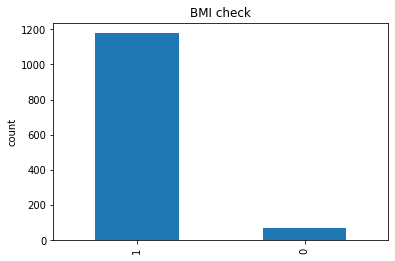

In [83]:
print(mpg1['BMI'].value_counts())

mpg1['BMI'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('BMI check')
plt.show()
#1은 정상, 0은 과체중

1    992
0    257
Name: TCD, dtype: int64


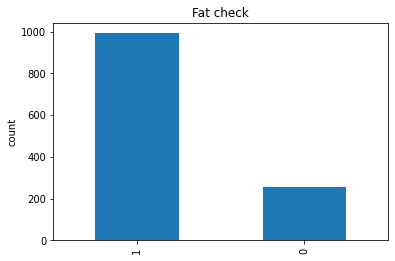

In [84]:
print(mpg1['TCD'].value_counts())

mpg1['TCD'].value_counts().plot.bar()
plt.ylabel('count')
plt.title('Fat check')
plt.show()
#1은 정상, 0은 경계 및 위험

In [85]:
print(mpg1.info()) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1249 non-null   int64  
 1   height         1249 non-null   int64  
 2   weight         1249 non-null   int64  
 3   waist          1249 non-null   float64
 4   eye_left       1249 non-null   float64
 5   eye_right      1249 non-null   float64
 6   ear_left       1249 non-null   int64  
 7   ear_right      1249 non-null   int64  
 8   SBP            1249 non-null   float64
 9   DBP            1249 non-null   float64
 10  FBS            1249 non-null   float64
 11  total_chole    1249 non-null   float64
 12  TCD            1249 non-null   object 
 13  HDL            1249 non-null   float64
 14  LDL            1249 non-null   float64
 15  hemoglobin     1249 non-null   float64
 16  PTU            1249 non-null   float64
 17  SCT            1249 non-null   float64
 18  AST     

In [86]:
mpg1.describe()

,age,height,weight,waist,eye_left,eye_right,ear_left,ear_right,SBP,DBP,...,LDL,hemoglobin,PTU,SCT,AST,ALT,GTP,dental_exam,dental_caries,tartar
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.00000,1249.000000,1249.000000,1249.0,1249.000000,1249.000000
mean,11.639712,161.737390,63.799039,82.505685,0.925620,0.904884,1.067254,1.062450,122.726181,75.997598,...,120.479584,14.250040,1.110488,0.881105,26.86309,26.672538,35.453163,1.0,0.164131,0.591673
std,2.173535,8.995185,12.719186,9.844860,0.652522,0.476381,0.253739,0.245356,14.461663,9.689779,...,37.611498,1.537961,0.503794,0.356008,13.92527,23.392743,35.973387,0.0,0.370543,0.588180
min,9.000000,130.000000,30.000000,57.000000,0.100000,0.100000,1.000000,1.000000,80.000000,50.000000,...,19.000000,6.500000,1.000000,0.400000,8.00000,2.000000,3.000000,1.0,0.000000,0.000000
25%,10.000000,155.000000,55.000000,75.500000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,95.000000,13.300000,1.000000,0.700000,20.00000,16.000000,17.000000,1.0,0.000000,0.000000
50%,12.000000,160.000000,65.000000,83.000000,0.900000,0.900000,1.000000,1.000000,122.000000,76.000000,...,120.000000,14.300000,1.000000,0.900000,24.00000,21.000000,24.000000,1.0,0.000000,1.000000
75%,13.000000,170.000000,70.000000,89.000000,1.000000,1.000000,1.000000,1.000000,132.000000,82.000000,...,146.000000,15.400000,1.000000,1.000000,29.00000,31.000000,39.000000,1.0,0.000000,1.000000
max,18.000000,190.000000,120.000000,121.200000,9.900000,9.900000,3.000000,3.000000,176.000000,130.000000,...,251.000000,18.100000,6.000000,8.700000,265.00000,477.000000,445.000000,1.0,1.000000,2.000000


In [87]:
col1=mpg1.columns[13:].to_list()
col2=mpg1.columns[:13].to_list()
new_col=col1+col2
mpg1=mpg1[new_col]
print(mpg1.info())
mpg1.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1249 entries, 6 to 9974
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HDL            1249 non-null   float64
 1   LDL            1249 non-null   float64
 2   hemoglobin     1249 non-null   float64
 3   PTU            1249 non-null   float64
 4   SCT            1249 non-null   float64
 5   AST            1249 non-null   float64
 6   ALT            1249 non-null   float64
 7   GTP            1249 non-null   float64
 8   alcohol        1249 non-null   object 
 9   dental_exam    1249 non-null   int64  
 10  dental_caries  1249 non-null   float64
 11  tartar         1249 non-null   float64
 12  BMI            1249 non-null   object 
 13  age            1249 non-null   int64  
 14  height         1249 non-null   int64  
 15  weight         1249 non-null   int64  
 16  waist          1249 non-null   float64
 17  eye_left       1249 non-null   float64
 18  eye_righ

,HDL,LDL,hemoglobin,PTU,SCT,AST,ALT,GTP,dental_exam,dental_caries,...,weight,waist,eye_left,eye_right,ear_left,ear_right,SBP,DBP,FBS,total_chole
count,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.00000,1249.000000,1249.000000,1249.0,1249.000000,...,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000,1249.000000
mean,55.847878,120.479584,14.250040,1.110488,0.881105,26.86309,26.672538,35.453163,1.0,0.164131,...,63.799039,82.505685,0.925620,0.904884,1.067254,1.062450,122.726181,75.997598,103.409928,201.453163
std,14.002950,37.611498,1.537961,0.503794,0.356008,13.92527,23.392743,35.973387,0.0,0.370543,...,12.719186,9.844860,0.652522,0.476381,0.253739,0.245356,14.461663,9.689779,23.285163,41.282151
min,26.000000,19.000000,6.500000,1.000000,0.400000,8.00000,2.000000,3.000000,1.0,0.000000,...,30.000000,57.000000,0.100000,0.100000,1.000000,1.000000,80.000000,50.000000,61.000000,70.000000
25%,45.000000,95.000000,13.300000,1.000000,0.700000,20.00000,16.000000,17.000000,1.0,0.000000,...,55.000000,75.500000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,91.000000,172.000000
50%,54.000000,120.000000,14.300000,1.000000,0.900000,24.00000,21.000000,24.000000,1.0,0.000000,...,65.000000,83.000000,0.900000,0.900000,1.000000,1.000000,122.000000,76.000000,98.000000,200.000000
75%,64.000000,146.000000,15.400000,1.000000,1.000000,29.00000,31.000000,39.000000,1.0,0.000000,...,70.000000,89.000000,1.000000,1.000000,1.000000,1.000000,132.000000,82.000000,108.000000,228.000000
max,119.000000,251.000000,18.100000,6.000000,8.700000,265.00000,477.000000,445.000000,1.0,1.000000,...,120.000000,121.200000,9.900000,9.900000,3.000000,3.000000,176.000000,130.000000,314.000000,355.000000


In [88]:
print(mpg1.columns)

Index(['HDL', 'LDL', 'hemoglobin', 'PTU', 'SCT', 'AST', 'ALT', 'GTP',
       'alcohol', 'dental_exam', 'dental_caries', 'tartar', 'BMI', 'age',
       'height', 'weight', 'waist', 'eye_left', 'eye_right', 'ear_left',
       'ear_right', 'SBP', 'DBP', 'FBS', 'total_chole', 'TCD'],
      dtype='object')


#분류모델(1) **의사결정나무**

In [89]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X = mpg1.iloc[:, :-1] 
y = mpg1.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 1.000
시험용 데이터 정확도: 0.776


In [90]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.991
시험용 데이터 정확도: 0.780


In [91]:
tree = DecisionTreeClassifier(max_depth=5, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.895
시험용 데이터 정확도: 0.812


In [92]:
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(X_train, y_train)

print("학습용 데이터 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("시험용 데이터 정확도: {:.3f}".format(tree.score(X_test, y_test)))

학습용 데이터 정확도: 0.973
시험용 데이터 정확도: 0.812


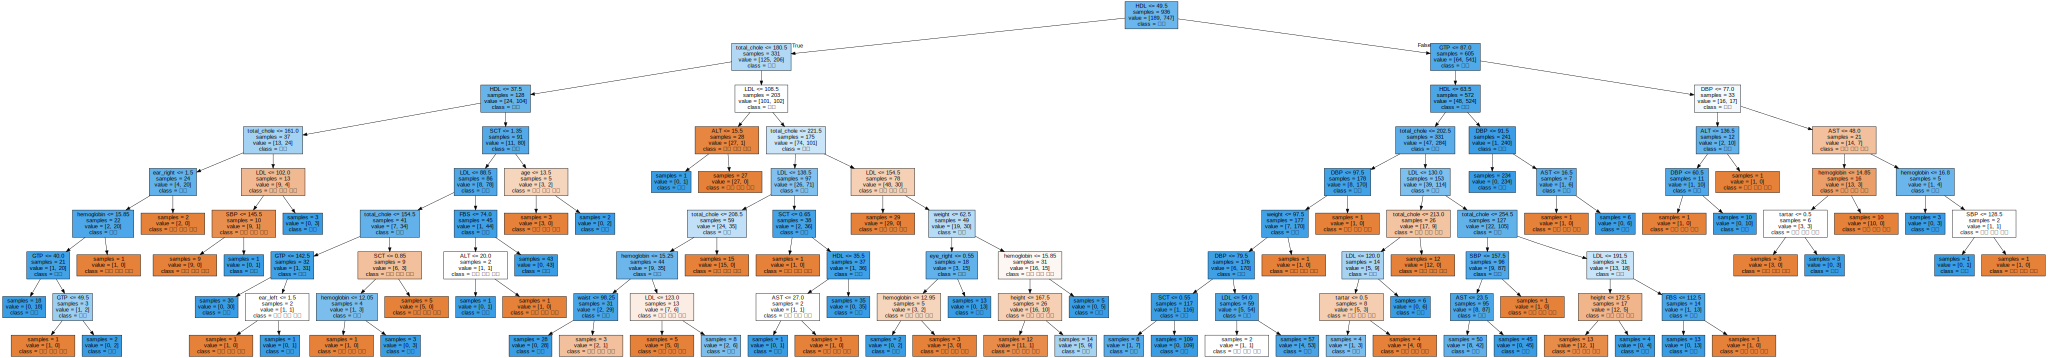

In [94]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(tree, out_file="tree.dot", class_names=[ "경계 혹은 위험", "정상"],
                feature_names=mpg1.columns[:-1], impurity=False, filled=True)

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

##의사결정나무 중요도

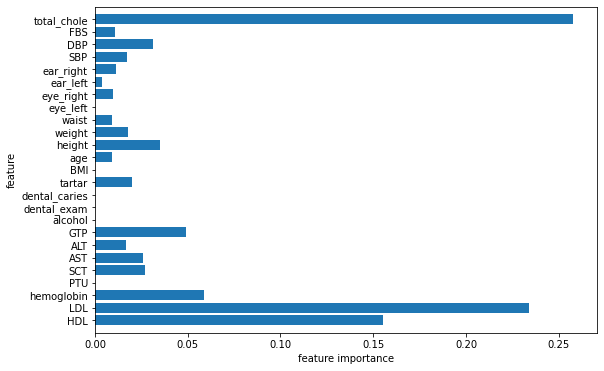

In [95]:
import numpy as np

def plot_feature_importances_mpg1(model): 
    plt.rcParams["figure.figsize"] = (9,6) 
    n_features = len(mpg1.columns[:-1])
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), mpg1.columns[:-1]) 
    plt.xlabel("feature importance")
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_mpg1(tree)

##*의사결정나무 인사이트 도출*

*의사결정나무의 변수별 중요도를 확인한 결과, 가장 중요한 변수는 총 콜레스테롤(total_chole)임을 확인할 수 있었다. total_chole와 더불어 LDL 콜레스테롤(LDL)과 HDL 콜레스테롤(HDL)도 높은 중요도를 가지고 있음을 확인할 수 있었고 이를 통해 트리글리세라이드(TCD), 즉 중성지방 수치에 콜레스테롤 수치가 다른 변수에 비해 큰 영향을 미침을 알 수 있었다.*

#분류모델(2) **랜덤포레스트**

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


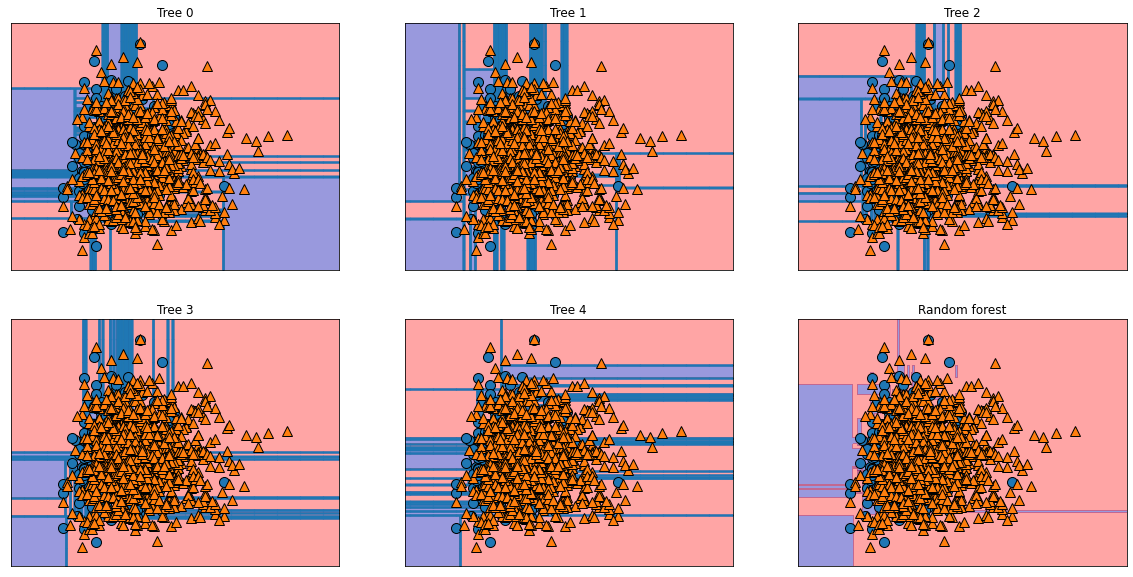

In [96]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train.iloc[:, 0:2], y_train)

fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X.iloc[:, 0:2].values, y, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X.iloc[:, 0:2].values, fill=True, ax=axes[-1, -1], alpha=.4)
axes[-1, -1].set_title("Random forest")
mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y)
plt.show()

In [97]:
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("학습용 데이터 세트 정확도: {:.3f}".format(forest.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(forest.score(X_test, y_test)))

학습용 데이터 세트 정확도: 1.000
시험용 데이터 세트 정확도: 0.815


##랜덤포레스트 중요도

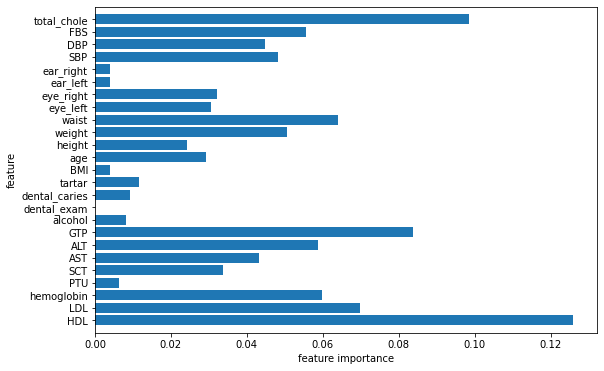

In [98]:
plot_feature_importances_mpg1(forest)

##*랜덤포레스트 인사이트 도출*

*의사결정나무와 비교 시 전반적으로 중요도가 높아졌음을 확인할 수 있었다. 총 콜레스테롤의 중요도가 가장 높았던 의사결정나무와 비교했을 때, 랜덤포레스트는 HDL 콜레스테롤의 중요도가 가장 높았고 총 콜레스테롤의 중요도 또한 2번째로 높았지만 LDL 콜레스테롤의 중요도보다 감마지피티(GTP)의 중요도가 더 높게 나왔음을 알 수 있었다. 혈압 및 혈당 관련 수치인 FBS(공복 혈당), DBP(이완기혈압), SBP(수축기혈압)의 중요도도 높은 편에 속했으며 이외에도 waist(허리 둘레), hemoglobin(혈색소)의 중요도도 높음을 확인할 수 있었다.*

#분류모델(3) **그래디언트 부스팅**

In [99]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [100]:
print("학습용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습용 데이터 세트 정확도: 0.982
시험용 데이터 세트 정확도: 0.879


##그래디언트 부스팅 중요도

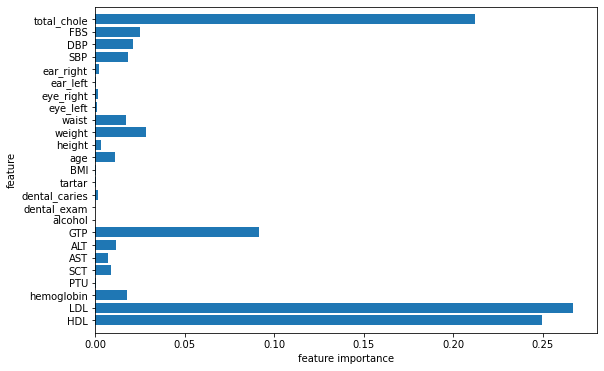

In [101]:
plot_feature_importances_mpg1(gbrt)

In [102]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.858
시험용 데이터 세트 정확도: 0.805


In [103]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("학습 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_train, y_train)))
print("시험용 데이터 세트 정확도: {:.3f}".format(gbrt.score(X_test, y_test)))

학습 데이터 세트 정확도: 0.828
시험용 데이터 세트 정확도: 0.796


##*그래디언트 부스팅 인사이트 도출*

*그래디언트 부스팅의 중요 변수는 의사결정나무의 중요 변수와 비슷했지만 중요 수치가 조금씩 달랐다. 우선 의사결정나무의 경우 총 콜레스테롤의 중요도가 가장 높게 나왔고 HDL 콜레스테롤, LDL 콜레스테롤 순으로 중요도가 높게 나왔으나 그래디언트 부스팅의 경우 LDL 콜레스테롤의 중요도가 가장 높고 그 다음으로 HDL 콜레스테롤의 중요도가 높음을 확인할 수 있었다. 랜덤포레스트의 중요 변수와 비슷하게 감마지티피 또한 중요도가 그 다음으로 높음을 확인할 수 있었다. 이외에 공복 혈당, 수축/이완기혈압의 중요도는 비교적 낮게 나왔으며 허리 둘레보다 오히려 몸무게의 중요도가 높게 측정되었음을 확인할 수 있었다.*

# **교차검증**

In [104]:
from sklearn.model_selection import cross_val_score

dt_scores = cross_val_score(tree, X_train, y_train, cv=4, scoring='accuracy')
rf_scores = cross_val_score(forest, X_train, y_train, cv=4, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=4, scoring='accuracy')

print("Accuracy")
print("Decision tree: ", dt_scores) 
print("Random forest: ", rf_scores) 
print("Gradient boosting: ", gbrt_scores) 

print("Accuracy mean")
print("Decision tree :{:.3f}".format(dt_scores.mean()))
print("Random forest :{:.3f}".format(rf_scores.mean()))
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean()))

Accuracy
Decision tree:  [0.78632479 0.74358974 0.73076923 0.77350427]
Random forest:  [0.83760684 0.8034188  0.83760684 0.83760684]
Gradient boosting:  [0.81623932 0.82905983 0.83333333 0.81623932]
Accuracy mean
Decision tree :0.759
Random forest :0.829
Gradient boosting :0.824


In [105]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10)

print(kf)

dt_scores = cross_val_score(tree, X_train, y_train, cv=kf, scoring='accuracy')  
rf_scores = cross_val_score(forest, X_train, y_train, cv=kf, scoring='accuracy')
gbrt_scores = cross_val_score(gbrt, X_train, y_train, cv=kf, scoring='accuracy')

print("Accuracy mean -- StratifiedKFold 이용")
print("Decision tree :{:.3f}".format(dt_scores.mean())) 
print("Random forest :{:.3f}".format(rf_scores.mean())) 
print("Gradient boosting :{:.3f}".format(gbrt_scores.mean())) 

StratifiedKFold(n_splits=10, random_state=None, shuffle=False)
Accuracy mean -- StratifiedKFold 이용
Decision tree :0.776
Random forest :0.822
Gradient boosting :0.825
